In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
# from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
import mglearn as mg
from sklearn import preprocessing
import random
from sklearn import metrics
from scipy import stats
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.metrics import roc_curve, roc_auc_score
# from eli5.sklearn import PermutationImportance
import shap
import seaborn as sns

3개

DATA/hn2007_all.csv
DATA/hn2008_all.csv
DATA/hn2009_all.csv
DATA/hn2010_all.csv
DATA/hn2011_all.csv
DATA/hn2012_all.csv
DATA/hn2013_all.csv
DATA/hn2014_all.csv
DATA/hn2015_all.csv
DATA/hn2016_all.csv
DATA/hn2017_all.csv
DATA/hn2018_all.csv
DATA/hn2019_all.csv


<Figure size 432x288 with 0 Axes>

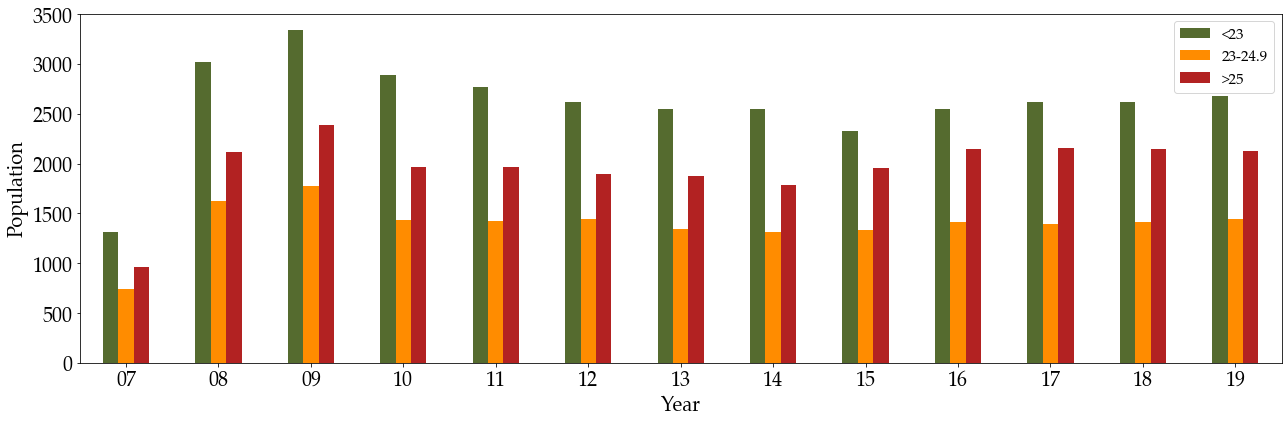

<Figure size 432x288 with 0 Axes>

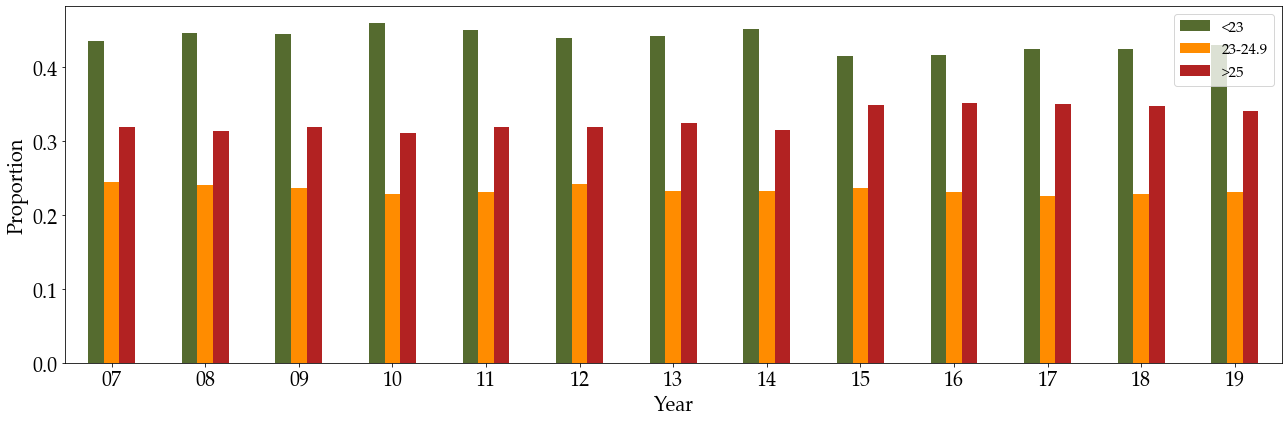

In [2]:
Year = []
Group_0 = []
Group_1 = []
Group_2 = []
Total = []
drop = []
Raw_size = []

for i in range(13):
    
    PATH = "DATA/hn20" + str(i+7).zfill(2) + "_all.csv"
    print(PATH)
    
    data = pd.read_csv(PATH,encoding='utf-8',low_memory=False)
    
    data['HE_BMI'] = pd.to_numeric(data['HE_BMI'], errors='coerce').astype(float).round(2)
    
    Year.append(str(i+7).zfill(2))
    Group_0.append(len(data['HE_BMI'][data['HE_BMI']<23]))
    Group_1.append(len(data['HE_BMI'][(data['HE_BMI']<=25) & (data['HE_BMI']>23)]))
    Group_2.append(len(data['HE_BMI'][data['HE_BMI']>25]))
    Total.append(len(data['HE_BMI'][data['HE_BMI']<23]) + len(data['HE_BMI'][(data['HE_BMI']<25) & (data['HE_BMI']>=23)]) + len(data['HE_BMI'][data['HE_BMI']>25]))
    drop.append(len(data['HE_BMI'].dropna()))
    Raw_size.append(len(data))
    
df = pd.DataFrame({'Year' : Year,
                'Group_0' : Group_0,
                'Group_1' : Group_1,
                'Group_2' : Group_2,
                'Total' : Total,
                'drop' : drop,
                'Raw_size' : Raw_size})

df2 = pd.DataFrame({'Year' : Year,
                    'Group_0' : df['Group_0'].divide(df['Total']),
                    'Group_1' : df['Group_1'].divide(df['Total']),
                    'Group_2' : df['Group_2'].divide(df['Total'])})

df3 = pd.DataFrame({'age' : data['age'].values,
                    'BMI' : data['HE_BMI'].values,
                    'gender' : data['sex'].values})

plt.figure(1)
plt.rcParams["font.family"] = "Palatino Linotype"
ax = df.plot.bar(x='Year', y=['Group_0', 'Group_1', 'Group_2'],
                 figsize=(18,6),
                 color=['darkolivegreen','darkorange','firebrick'])
ax.set_xticklabels(Year, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.legend(['<23','23-24.9','>25'], fontsize=15)
plt.tight_layout()
# plt.savefig('Figure_1.eps', format='eps')
# plt.savefig('Figure_1_.png')
plt.show()


plt.figure(2)
plt.rcParams["font.family"] = "Palatino Linotype"
ax = df2.plot.bar(x='Year', y=['Group_0', 'Group_1', 'Group_2'],
                  figsize=(18,6),
                  color=['darkolivegreen','darkorange','firebrick'])
ax.set_xticklabels(Year, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Proportion', fontsize=20)
plt.legend(['<23','23-24.9','>25'], fontsize=15)
plt.tight_layout()
# plt.savefig('Figure_1_Normalize.eps', format='eps')
# plt.savefig('Figure_1_Normalize.png')
plt.show()

DATA/hn2007_all.csv
DATA/hn2008_all.csv
DATA/hn2009_all.csv
DATA/hn2010_all.csv
DATA/hn2011_all.csv
DATA/hn2012_all.csv
DATA/hn2013_all.csv
DATA/hn2014_all.csv
DATA/hn2015_all.csv
DATA/hn2016_all.csv



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


DATA/hn2017_all.csv



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


DATA/hn2018_all.csv



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


DATA/hn2019_all.csv



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


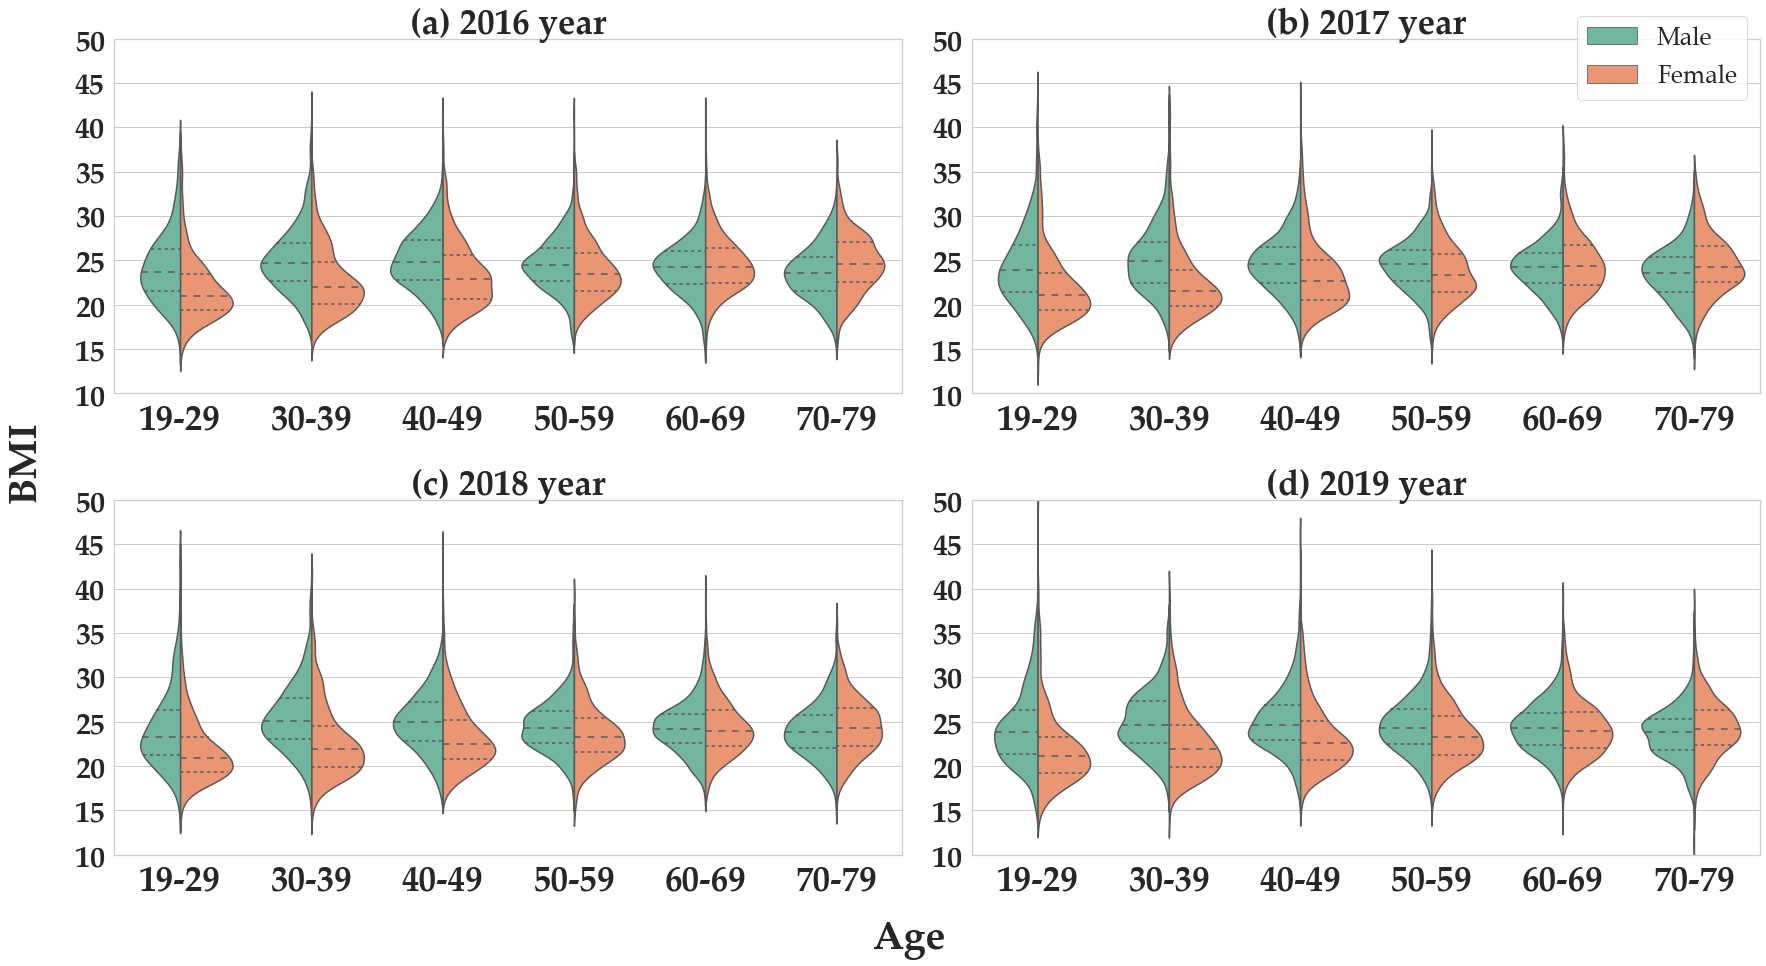

<Figure size 432x288 with 0 Axes>

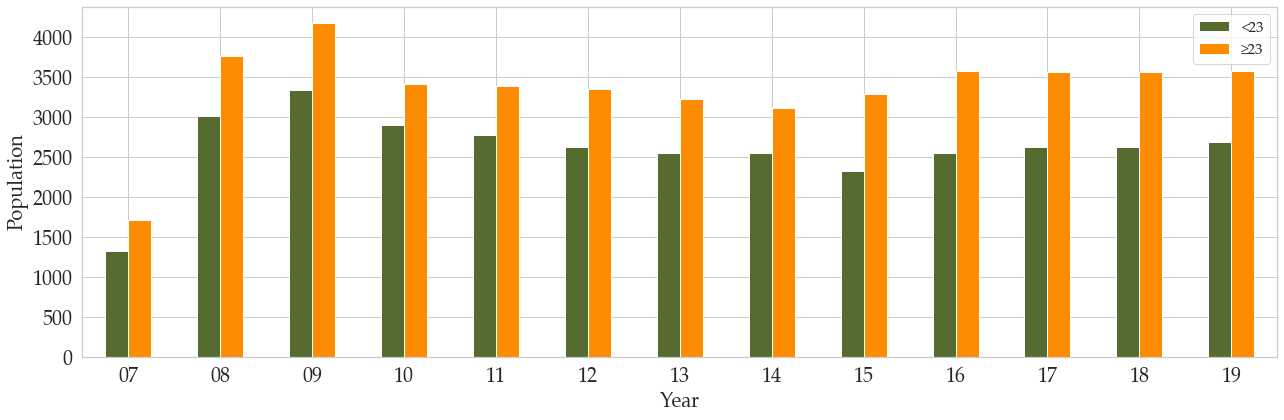

<Figure size 432x288 with 0 Axes>

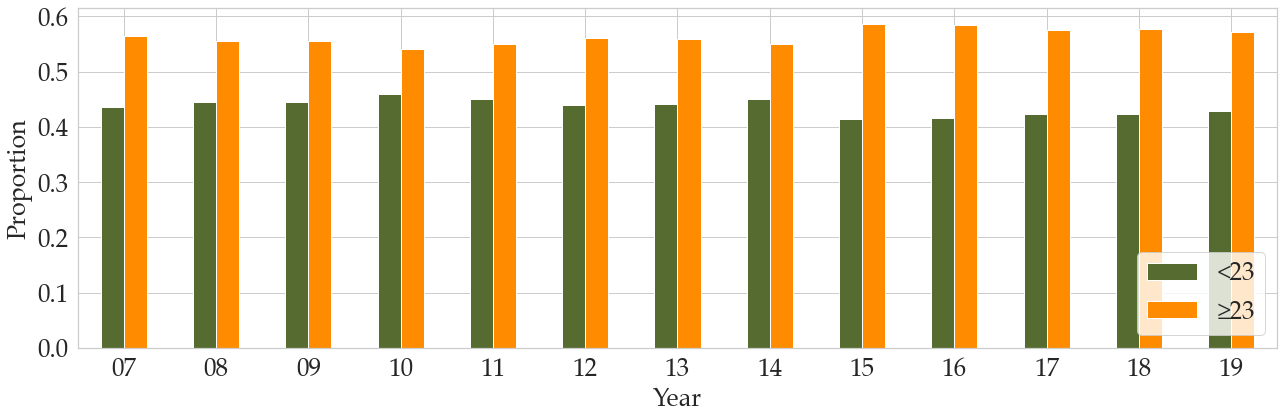

In [3]:
sup = "_1,2"
day = '0224_test'
PATH = day + "/Figure" + sup
import os
import seaborn as sns
os.makedirs(PATH,exist_ok=True)
plt.rcParams["font.family"] = "Palatino Linotype"

Year = []
Group_0, Group_1 = [],[]
Total = []
drop = []
Raw_size = []
age_1929, age_3039, age_4049, age_5059, age_6069, age_7080 = [],[],[],[],[],[]
title_label = ['(a)', '(b)', '(c)', '(d)']

fig3 = plt.figure(3, figsize=(24,13))
for i in range(13):    
    PATH2 = "DATA/hn20" + str(i+7).zfill(2) + "_all.csv"
    print(PATH2)
    
    data = pd.read_csv(PATH2,encoding='utf-8',low_memory=False)
    
    data['HE_BMI'] = pd.to_numeric(data['HE_BMI'], errors='coerce').astype(float).round(2)
    
    Year.append(str(i+7).zfill(2))
    Group_0.append(len(data['HE_BMI'][data['HE_BMI']<23]))
    Group_1.append(len(data['HE_BMI'][data['HE_BMI']>=23]))
    # Group_2.append(len(data['HE_BMI'][data['HE_BMI']>25]))
    Total.append(len(data['HE_BMI'][data['HE_BMI']<23]) + len(data['HE_BMI'][data['HE_BMI']>=23]))
    drop.append(len(data['HE_BMI'].dropna()))
    Raw_size.append(len(data))
    # 
    tmp1 = data[['HE_BMI', 'age']][data['sex'] == 1]
    tmp2 = data[['HE_BMI', 'age']][data['sex'] == 2]


    if i > 8:
        ## Visualize ##

        violin_df = data[['age', 'HE_BMI', 'sex']]

        for i2 in violin_df.index:
            if (violin_df.loc[i2, 'age'] >= 19) & (violin_df.loc[i2, 'age'] < 30):
                violin_df.loc[i2, 'age_list'] = 1 # plot에 순서대로 추가될 수 있도록 int지정
                
            elif (violin_df.loc[i2, 'age'] >= 30) & (violin_df.loc[i2, 'age'] < 40):
                violin_df.loc[i2, 'age_list'] = 2
            
            elif (violin_df.loc[i2, 'age'] >= 40) & (violin_df.loc[i2, 'age'] < 50):
                violin_df.loc[i2, 'age_list'] = 3
                
            elif (violin_df.loc[i2, 'age'] >= 50) & (violin_df.loc[i2, 'age'] < 60):
                violin_df.loc[i2, 'age_list'] = 4
                
            elif (violin_df.loc[i2, 'age'] >= 60) & (violin_df.loc[i2, 'age'] < 70):
                violin_df.loc[i2, 'age_list'] = 5
                
            elif (violin_df.loc[i2, 'age'] >= 70) & (violin_df.loc[i2, 'age'] < 80):
                violin_df.loc[i2, 'age_list'] = 6
        
        
        
        # for i2 in range(4):
        #     print(i2)
        ax = fig3.add_subplot(2,2,i-8)
        sns.set_theme(style="whitegrid")
        plt.rcParams["font.family"] = "Palatino Linotype"
        ax = sns.violinplot("age_list", "HE_BMI", hue ="sex",
                        data = violin_df, split= True, palette="Set2", inner="quartile")
        plt.yticks(fontsize=30, fontweight='bold')
        # plt.xticks(fontsize=20)
        ax.set_xticklabels(['19-29', '30-39', '40-49', '50-59', '60-69', '70-79'], fontsize=35, fontweight='bold')
        if i-8 == 2:
            ax.legend(handles=ax.legend_.legendHandles,
                    labels=['Male', 'Female'],
                    bbox_to_anchor=(1, 1.1),
                    fontsize = 25)
        else:
            ax.legend_.remove()
        # plt.legend(fontsize=15)
        ax.set_title(title_label[i-9] + ' 20' + str(i+7).zfill(2) + ' year', fontsize=35, fontweight='bold')
        plt.ylabel(' ')
        plt.xlabel(' ')
        ax.set_ylim([10, 50])
        # plt.savefig(PATH + '/20' + str(i+7).zfill(2) + 'Violinplot.eps', format='eps')
        # plt.savefig(PATH + '/20' + str(i+7).zfill(2) + 'Violinplot.png')
        # plt.savefig(PATH + '/20' + str(i+7).zfill(2) + 'Violinplot.pdf')
        # plt.show()
        # plt.close()
# plt.show()
# fig3.legend(labels=['Man', 'Women'], ncol=2, fontsize = 30, loc = (0.5, -0.01,), color = ['r', 'b'])        
fig3.text(0.5, -0.01, 'Age', va='center', ha='center', fontsize=40, fontweight='bold')
fig3.text(-0.01, 0.5, 'BMI', va='center', ha='center', rotation='vertical', fontsize = 40, fontweight='bold')
fig3.tight_layout()
fig3.savefig(PATH + '/Violinplot.pdf')
fig3.savefig(PATH + '/Violinplot.png')
    
df = pd.DataFrame({'Year' : Year,
                'Group_0' : Group_0,
                'Group_1' : Group_1,
                'Total' : Total,
                'drop' : drop,
                'Raw_size' : Raw_size})

df2 = pd.DataFrame({'Year' : Year,
                    'Group_0' : df['Group_0'].divide(df['Total']),
                    'Group_1' : df['Group_1'].divide(df['Total'])})

plt.figure(1)
plt.rcParams["font.family"] = "Palatino Linotype"
ax = df.plot.bar(x='Year', y=['Group_0', 'Group_1'],
                 figsize=(18,6),
                 color=['darkolivegreen','darkorange'])
ax.set_xticklabels(Year, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.legend(['<23','≥23'], fontsize=15)
plt.tight_layout()
# plt.savefig(PATH + '/Figure_1_revise.eps', format='eps')
plt.savefig(PATH + '/Figure_1_revise.png')
plt.savefig(PATH + '/Figure_1_revise.pdf')
# plt.show()


plt.figure(2)
plt.rcParams["font.family"] = "Palatino Linotype"
ax = df2.plot.bar(x='Year', y=['Group_0', 'Group_1'],
                  figsize=(18,6),
                  color=['darkolivegreen','darkorange'])#,'firebrick'])
ax.set_xticklabels(Year, fontsize=25, rotation=0)
plt.yticks(fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Proportion', fontsize=25)
plt.legend(['<23','≥23'], fontsize=25, loc = 'lower right')#, bbox_to_anchor = (1, 1.3))
plt.tight_layout()
# plt.savefig(PATH + '/Figure_1_revise_Normalize.eps', format='eps')
plt.savefig(PATH + '/Figure_1_revise_Normalize.png')
plt.savefig(PATH + '/Figure_1_revise_Normalize.pdf')
# plt.show()

In [4]:
df2

,Year,Group_0,Group_1
0,07,0.435185,0.564815
1,08,0.445084,0.554916
2,09,0.444489,0.555511
3,10,0.458855,0.541145
4,11,0.450032,0.549968
5,12,0.439143,0.560857
6,13,0.441768,0.558232
7,14,0.450565,0.549435
8,15,0.414339,0.585661
9,16,0.416313,0.583687


asdasd

In [ ]:

BMI_grade = []
iter = 0
iteration_test = []
ii = 0
for ii in [1,2]: # sex
    data10 = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
    data11 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
    data12 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
    data13 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)
    
    gender10 = data10['sex']
    gender11 = data11['sex']
    gender12 = data12['sex']
    gender13 = data13['sex']
    
    age_list = [[19, 39], [39, 59], [59, 79]]
    for age in range(len(age_list)): 
        
        data10_copy = data10[(data10['age']>=age_list[age][0]) & (data10['age']<age_list[age][1])].copy()
        data11_copy = data11[(data11['age']>=age_list[age][0]) & (data11['age']<age_list[age][1])].copy()
        data12_copy = data12[(data12['age']>=age_list[age][0]) & (data12['age']<age_list[age][1])].copy()
        data13_copy = data13[(data13['age']>=age_list[age][0]) & (data13['age']<age_list[age][1])].copy()
        
        sex = [ii]
        data10_copy = data10_copy.loc[gender10.isin(sex)]
        data11_copy = data11_copy.loc[gender11.isin(sex)]
        data12_copy = data12_copy.loc[gender12.isin(sex)]
        data13_copy = data13_copy.loc[gender13.isin(sex)]
        
        data_select10 = data10_copy[column_name_group].copy()
        data_select11 = data11_copy[column_name_group].copy()
        data_select12 = data12_copy[column_name_group].copy()
        data_select13 = data13_copy[column_name_group].copy()
        
        # print(age_list[age])
        for i in range(len(column_feature)):
            BMI_grade.append([])
            ## 숫자로 바꿔주는 코드임.
            for j in range(len(column_feature[i])):
                data_select10[column_feature[i][j]] = pd.to_numeric(data_select10[column_feature[i][j]], errors='coerce').astype(float).round(2)
                data_select11[column_feature[i][j]] = pd.to_numeric(data_select11[column_feature[i][j]], errors='coerce').astype(float).round(2)
                data_select12[column_feature[i][j]] = pd.to_numeric(data_select12[column_feature[i][j]], errors='coerce').astype(float).round(2)
                data_select13[column_feature[i][j]] = pd.to_numeric(data_select13[column_feature[i][j]], errors='coerce').astype(float).round(2)
            

            df10 = data_select10[column_feature[i]]
            df11 = data_select11[column_feature[i]]
            df12 = data_select12[column_feature[i]]
            df13 = data_select13[column_feature[i]]
            
            df = pd.concat([df10, df11, df12, df13], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
            # print(len(df))
            df = df.dropna(how = 'any')
            df = df.sort_values(by = 'HE_BMI')
            # print(len(df))
            for j in range(len(column_feature[i])):
                ### 8,9제거
                if column_feature[i][j] in list999:
                    df.drop(df[(df[column_feature[i][j]] == 888) | (df[column_feature[i][j]] == 999)].index, inplace = True)
                elif column_feature[i][j] in list88:
                    df.drop(df[(df[column_feature[i][j]] == 88) | (df[column_feature[i][j]] == 99)].index, inplace = True)
                else:
                    df.drop(df[(df[column_feature[i][j]] == 8) | (df[column_feature[i][j]] == 9)].index, inplace = True)
            # print(len(df))
            BMI_tmp = df['HE_BMI']
            for k in range(len(df)):
                if BMI_tmp.iloc[k] < 23:
                    BMI_grade[iter].append(0)
                elif 23 <= BMI_tmp.iloc[k] < 25:
                    BMI_grade[iter].append(0)
                elif 25 <= BMI_tmp.iloc[k] <= 30:
                    BMI_grade[iter].append(1)
                elif 30 < BMI_tmp.iloc[k]:
                    BMI_grade[iter].append(1)
            tree_data = df.drop(['HE_BMI'],axis = 1)
            
            
            iteration_test.append([iter,ct])
            if tree_data.empty == False:
                #########################################################
                # data normalizaion
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(tree_data)
                tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
                tree_data['BMI_grade'] = BMI_grade[iter]
                # print(len(tree_data))
                cnt_list = tree_data['BMI_grade'].tolist()
                cnt1 = cnt_list.count(1)
                cnt0 = cnt_list.count(0)
                tree_data_1 = tree_data.copy()

                iteration_test[iter].append([cnt0, cnt1])
                
                if cnt1 * cnt0 != 0:
                    if cnt1/cnt0 > 1.2:
                        cnt_select = cnt1-cnt0 # 얼마나 차이가 나는지
                        local = tree_data_1.loc[(tree_data['BMI_grade']==0)] #0인 갯수가 부족하니까 그것들을 추출
                        idx = local.index.values # 추출한 것의 index
                        select_list = [random.choice(idx) for i in range(cnt_select)] #랜덤으로 추출된 idx들 모음
                        tree_data_2 = tree_data_1.iloc[select_list]
                        tree_data = pd.concat([tree_data_1,tree_data_2], ignore_index=True)

                    elif cnt0/cnt1 > 1.2:
                        cnt_select = cnt0-cnt1
                        local = tree_data_1.loc[(tree_data['BMI_grade']==1)]
                        idx = local.index.values
                        select_list = [random.choice(idx) for i in range(cnt_select)]
                        tree_data_2 = tree_data_1.iloc[select_list]
                        tree_data = pd.concat([tree_data_1,tree_data_2], ignore_index=True)

                    #######################
                    cnt_list = tree_data['BMI_grade'].tolist()
                    cnt1 = cnt_list.count(1)
                    cnt0 = cnt_list.count(0)
                    ########################
                    X = tree_data.iloc[:,:-1]
                    y = tree_data.iloc[:,-1:]
                    y = y.squeeze()
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
                    # print(len(X_train))
                    
                    ##########################################################
                    
                    
                    clf = ensemble.RandomForestClassifier(random_state=0)
                    clf.fit(X_train,y_train)
                    
                    #### Calculate Feature Importance 
                    feats = X.columns.tolist()
                    # print(feats)
                    # print(X_train[feats])
                    # perm = PermutationImportance(clf, random_state=0).fit(X_test, y_test) #여기엔 test를 fit 해야함
                    explainer = shap.TreeExplainer(clf)
                    shap_values = explainer.shap_values(X_train[feats])
                    
                    shap_feat_imp = pd.Series(np.abs(shap_values[0]).mean(axis=0), index=feats).sort_values(ascending=False)
                    # perm_feat_imp = pd.Series(perm.feature_importances_, index=feats).sort_values(ascending=False)
                    basic_feat_imp = pd.Series(clf.feature_importances_, index=feats).sort_values(ascending=False)

                    # feat_imp_archive = pd.DataFrame(index=feats, columns=['basic', 'perm', 'shap', 'mean'])
                    feat_imp_archive = pd.DataFrame(index=feats, columns=['basic', 'shap', 'mean'])

                    feat_imp_archive['basic'] = basic_feat_imp#.rank(ascending=False)
                    # feat_imp_archive['perm'] = perm_feat_imp#.rank(ascending=False)
                    feat_imp_archive['shap'] = shap_feat_imp#.rank(ascending=False)
                    # feat_imp_archive['mean'] = feat_imp_archive[['basic', 'perm', 'shap']].mean(axis=1)
                    feat_imp_archive['mean'] = feat_imp_archive[['basic', 'shap']].mean(axis=1)
                    feat_imp_archive = feat_imp_archive.sort_values(by='mean',ascending=False)
                    
                    
                    feat_imp_archive2 = feat_imp_archive.copy()
                    # feat_imp_archive.drop(['gender', 'age'], axis =1)
                    feat_imp_archive2.plot(kind='bar', figsize=(20, 10), title=str(age_list[age]) + ' feature importance')
                    # fig = plt.gcf()
                    # fig = feat_imp_archive2.get_figure()
                    plt.savefig(str(ii) + ' ' + str(age_list[age]) + ' output.png')
                    plt.close()
                    ## 그림 먼저 그리고 DataFrame에 gender랑 age 추가. 그림이 겹쳐서 다른 데이터 프레임으로 저장함.
                    
                    feat_imp_archive = feat_imp_archive.copy()
                    feat_imp_archive['gender'] = ii
                    feat_imp_archive['age'] = str(age_list[age])
                    
                    if ct != 0:
                        print(ct)
                        feat_imp_archive= pd.concat([dataframe_tmp, feat_imp_archive], join='inner') # 18년 19년 자료 합쳐주는 부분.
                        print(feat_imp_archive)
                        
                    dataframe_tmp = feat_imp_archive.copy()
                    #feat_imp_archive.to_csv(str(ii) + ' ' + str(age_list[age]) + ' RFC_feature_selection.csv')#, index=False)

                    
                    
                     
                    ct += 1
                    
                elif cnt1 * cnt0 == 0:
                    print('확인해야함!!')
                    print(column_feature[i])
                    
                
            iter += 1

feat_imp_archive = feat_imp_archive[['gender', 'age', 'basic', 'shap', 'mean']]
feat_imp_archive.to_csv('RFC_feature_selection.csv')#, index=False)

Make Heatmap

In [ ]:
BMI_grade = []
iter = 0
iteration_test = []

data = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
data2 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
data3 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
data4 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)

# gender = data['sex']
# gender2 = data2['sex']
# gender3 = data3['sex']
# gender4 = data4['sex']

age_list = [[19, 79]]#, [39, 59], [59, 79]]
for age in range(len(age_list)): 
    
    data_copy = data[(data['age']>=age_list[age][0]) & (data['age']<age_list[age][1])].copy()
    data2_copy = data2[(data2['age']>=age_list[age][0]) & (data2['age']<age_list[age][1])].copy()
    data3_copy = data3[(data3['age']>=age_list[age][0]) & (data3['age']<age_list[age][1])].copy()
    data4_copy = data4[(data4['age']>=age_list[age][0]) & (data4['age']<age_list[age][1])].copy()
    
    # sex = [ii]
    # data_copy = data_copy.loc[gender.isin(sex)]
    # data2_copy = data2_copy.loc[gender2.isin(sex)]
    # data3_copy = data3_copy.loc[gender3.isin(sex)]
    # data4_copy = data4_copy.loc[gender4.isin(sex)]
    
    data_select = data_copy[column_name_group].copy()
    data_select2 = data2_copy[column_name_group].copy()
    data_select3 = data3_copy[column_name_group].copy()
    data_select4 = data4_copy[column_name_group].copy()
    # print(age_list[age])
    for i in range(len(column_feature)):
        BMI_grade.append([])
        ## 숫자로 바꿔주는 코드임.
        for j in range(len(column_feature[i])):
            data_select[column_feature[i][j]] = pd.to_numeric(data_select[column_feature[i][j]], errors='coerce').astype(float).round(2)
            data_select2[column_feature[i][j]] = pd.to_numeric(data_select2[column_feature[i][j]], errors='coerce').astype(float).round(2)
            data_select3[column_feature[i][j]] = pd.to_numeric(data_select3[column_feature[i][j]], errors='coerce').astype(float).round(2)
            data_select4[column_feature[i][j]] = pd.to_numeric(data_select4[column_feature[i][j]], errors='coerce').astype(float).round(2)            #print(len(df)) #16000개
        

        df1 = data_select[column_feature[i]]
        df2 = data_select2[column_feature[i]]
        df3 = data_select3[column_feature[i]]
        df4 = data_select4[column_feature[i]]
        
        df = pd.concat([df1, df2, df3, df4], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
        df = df.dropna(how = 'any')
        df = df.sort_values(by = 'HE_BMI')
        # print(df)
        for j in range(len(column_feature[i])):
            ### 8,9제거
            if column_feature[i][j] in list999:
                df.drop(df[(df[column_feature[i][j]] == 888) | (df[column_feature[i][j]] == 999)].index, inplace = True)
            elif column_feature[i][j] in list88:
                df.drop(df[(df[column_feature[i][j]] == 88) | (df[column_feature[i][j]] == 99)].index, inplace = True)
            else:
                df.drop(df[(df[column_feature[i][j]] == 8) | (df[column_feature[i][j]] == 9)].index, inplace = True)

        BMI_tmp = df['HE_BMI']
        for k in range(len(df)): #여기서 문제가 생기는구나. 어떡할까
            # print(i+cl*(ii-1)+len(age_list)*(age))
            if BMI_tmp.iloc[k] < 23:
                BMI_grade[iter].append(0)
            elif 23 <= BMI_tmp.iloc[k] < 25:
                BMI_grade[iter].append(0)
            elif 25 <= BMI_tmp.iloc[k] <= 30:
                BMI_grade[iter].append(1)
            elif 30 < BMI_tmp.iloc[k]:
                BMI_grade[iter].append(1)
        tree_data = df.drop(['HE_BMI'],axis = 1)
        
        
        iteration_test.append([iter,ct])
        if tree_data.empty == False:
            #########################################################
            # data normalizaion
            min_max_scaler = preprocessing.MinMaxScaler()
            x_scaled = min_max_scaler.fit_transform(tree_data)
            tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
            tree_data['BMI_grade'] = BMI_grade[iter]

            cnt_list = tree_data['BMI_grade'].tolist()
            cnt1 = cnt_list.count(1)
            cnt0 = cnt_list.count(0)
            tree_data_1 = tree_data.copy()

            iteration_test[iter].append([cnt0, cnt1])
            
            if cnt1 * cnt0 != 0:
                if cnt1/cnt0 > 1.2:
                    cnt_select = cnt1-cnt0 # 얼마나 차이가 나는지
                    local = tree_data_1.loc[(tree_data['BMI_grade']==0)] #0인 갯수가 부족하니까 그것들을 추출
                    idx = local.index.values # 추출한 것의 index
                    select_list = [random.choice(idx) for i in range(cnt_select)] #랜덤으로 추출된 idx들 모음
                    tree_data_2 = tree_data_1.iloc[select_list]
                    tree_data = pd.concat([tree_data_1,tree_data_2], ignore_index=True)

                elif cnt0/cnt1 > 1.2:
                    cnt_select = cnt0-cnt1
                    local = tree_data_1.loc[(tree_data['BMI_grade']==1)]
                    idx = local.index.values
                    select_list = [random.choice(idx) for i in range(cnt_select)]
                    tree_data_2 = tree_data_1.iloc[select_list]
                    tree_data = pd.concat([tree_data_1,tree_data_2], ignore_index=True)

                #######################
                cnt_list = tree_data['BMI_grade'].tolist()
                cnt1 = cnt_list.count(1)
                cnt0 = cnt_list.count(0)
                ########################
                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                
                corrmat = tree_data.corr()
                top_corr_features = corrmat.index
                plt.figure(figsize=(30,30))
                g=sns.heatmap(tree_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
                
                
            elif cnt1 * cnt0 == 0:
                print('확인해야함!!')
                print(column_feature[i])
            
        iter += 1

In [ ]:
pl = pd.DataFrame(print_list,
                    columns=['gender',
                             '<= age <',
                            "group",
                            "list",
                            'Number Of 0',
                            'Number of 1',
                            'TP',
                            'FP',
                            'TN',
                            'FN',
                            'accuracy score',
                            'recall score',
                            'precision score',
                            'f1 score'])

pl.to_csv('RFC_feature_selection.csv', index=False)

In [ ]:
Feat = pd.read_csv('RFC_feature_selection.csv')
Feat = Feat.set_index('Unnamed: 0')
Feat = Feat[(Feat['age'] =='[19, 39]') & (Feat['gender'] == 1)]